# <center> Mapping the Tissue block in the reference organ</center>

##### Loading all the required libraries

In [ ]:
import ants
import numpy as np

##### Loading the data

In [ ]:
img=ants.image_read('./0_percent_fixed.nii.gz')
fixed_np=img.numpy()

moving=ants.image_read('./0_percent_moving.nii.gz')
moving_np=moving.numpy()

##### Computing the ideal overlap and the coordinates of the window
The ideal overlap is calculated amongst all overlap values between 50% to 95%

In [ ]:
chng_list,sim_list,x_list,y_list,z_list=[],[],[],[],[]
from tqdm import tqdm
for change in tqdm([i*.05 for i in range(1,11)]):
  best_sim,best_x,best_y,best_z=0,0,0,0
  x_step,y_step,z_step=moving_np.shape[0],moving_np.shape[1],moving_np.shape[2]
  for x in range(0,fixed_np.shape[0],int(x_step*change)):
    for y in range(0,fixed_np.shape[1],int(y_step*change)):
      for z in range(0,fixed_np.shape[2],int(z_step*change)):
        if x+x_step<=fixed_np.shape[0] and y+y_step<=fixed_np.shape[1] and z+z_step<=fixed_np.shape[2]:
          try:
            fixed=ants.from_numpy(fixed_np[x:x+x_step, y:y_step, z:z+z_step])
            sim=abs(ants.image_similarity(fixed,moving,metric_type='Correlation'))

            if sim>best_sim:
              best_sim,best_x,best_y,best_z=sim,x,y,z
          except: 
            continue

  chng_list.append(change)
  sim_list.append(best_sim)
  x_list.append(best_x)
  y_list.append(best_y)
  z_list.append(best_z)


100%|██████████| 10/10 [2:41:07<00:00, 966.77s/it]


##### Mapping the tissue block in the reference organ

In [ ]:
x_step,y_step,z_step=moving_np.shape[0],moving_np.shape[1],moving_np.shape[2]
fixed_np[best_x:best_x+x_step,best_y:best_y+y_step,47+z_step]*=100

##### Plotting the reference organ with the mapped tissue block

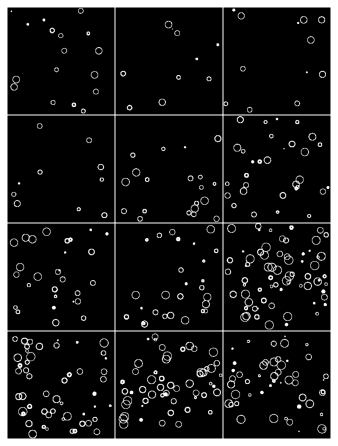

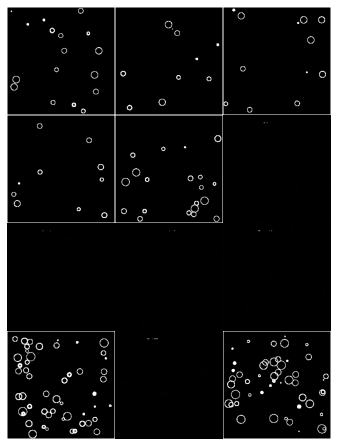

In [ ]:
img.plot()
ants.from_numpy(fixed_np).plot()

##### Storing the values in a csv file

In [ ]:
import pandas as pd
df1=pd.DataFrame()

df1['change']=chng_list
df1['sim']=sim_list
df1['x']=x_list
df1['y']=y_list
df1['z']=z_list


df1.to_csv('result_0_percent.csv')